In [2]:
pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline


In [5]:
from sklearn.datasets import load_breast_cancer

In [12]:
cancer_dataset= load_breast_cancer()
df=pd.DataFrame(cancer_dataset['data'],columns=cancer_dataset['feature_names'])
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
## Standardization

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(df)

scaled_data = scalar.transform(df)
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [15]:
# Applying PCA Algorithm to extract 2 features
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

data_pca = pca.fit_transform(scaled_data)
data_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [16]:
# best variance 
pca.explained_variance_

array([13.30499079,  5.7013746 ])

Text(0, 0.5, 'Second Principal Component')

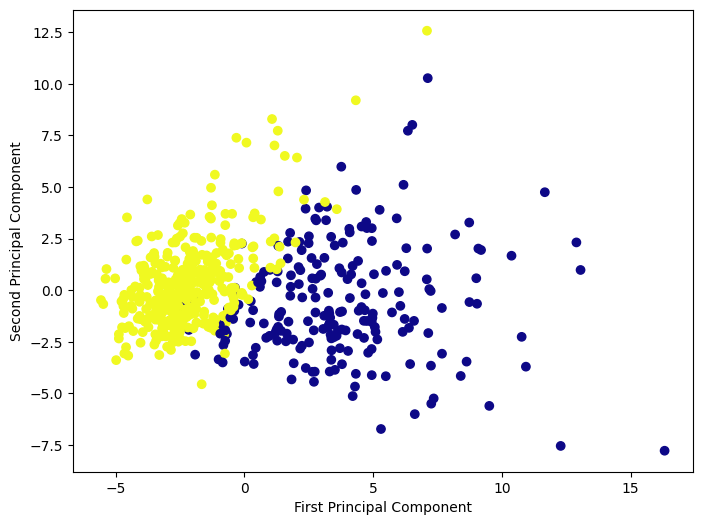

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(data_pca[:,0],data_pca[:,1],c=cancer_dataset['target'], cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')                                                 

### Radomized PCA

In [38]:
from sklearn.decomposition import PCA

# Create a PCA object with randomized SVD solver
pca = PCA(n_components=5, svd_solver='randomized', random_state=42)

# Fit and transform the data
X_reduced = pca.fit_transform(scaled_data)

print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768]


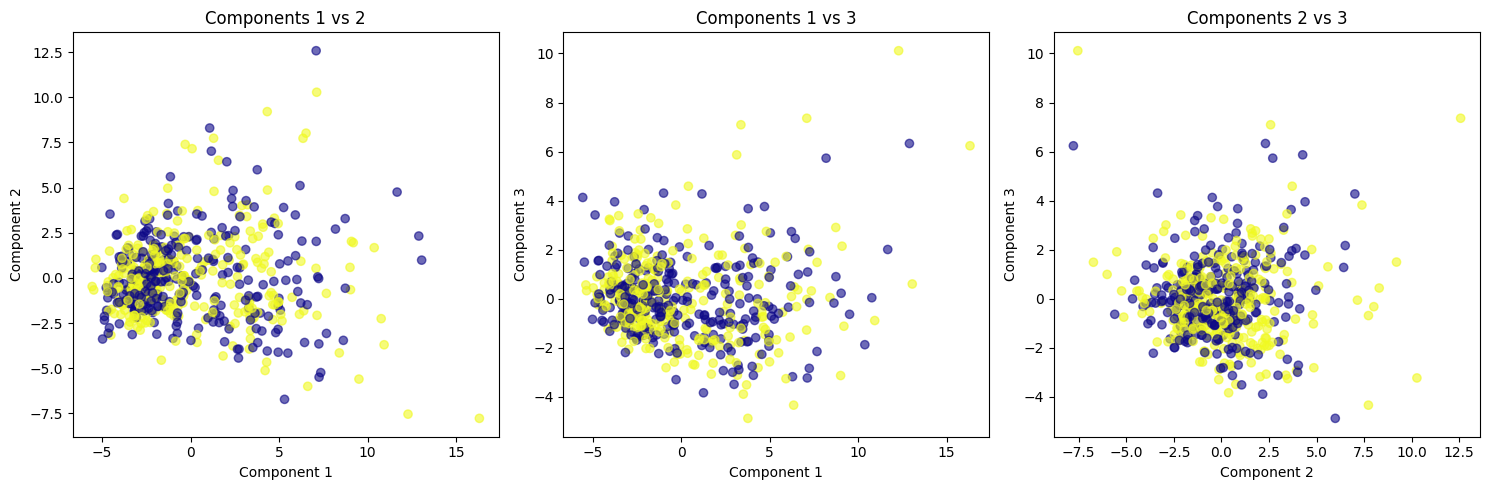

In [40]:
from itertools import combinations

# Pairwise scatter plot for first 3 components
pairs = list(combinations(range(3), 2))  # Choose combinations of components

plt.figure(figsize=(15, 5))
for i, (comp1, comp2) in enumerate(pairs):
    plt.subplot(1, 3, i + 1)
    plt.scatter(
        X_reduced[:, comp1], 
        X_reduced[:, comp2], 
        c=np.random.choice([0, 1], size=X_reduced.shape[0]),  # Replace with actual target labels
        cmap='plasma',
        alpha=0.6
    )
    plt.xlabel(f'Component {comp1 + 1}')
    plt.ylabel(f'Component {comp2 + 1}')
    plt.title(f'Components {comp1 + 1} vs {comp2 + 1}')
plt.tight_layout()
plt.show()



### Incremental PCA

In [ ]:
from sklearn.decomposition import IncrementalPCA

# Initialize IncrementalPCA with the number of components
ipca = IncrementalPCA(n_components=10, batch_size=500)

# Fit IncrementalPCA in batches
ipca.fit(scaled_data)

# Transform the data using the fitted IPCA model
data_ipca = ipca.transform(scaled_data)

print("Explained variance ratio:", ipca.explained_variance_ratio_)

Explained variance ratio: [0.4427202  0.18971157 0.09393089 0.06601312 0.05495682 0.04024186
 0.02249913 0.01586812 0.01389225 0.01163114]


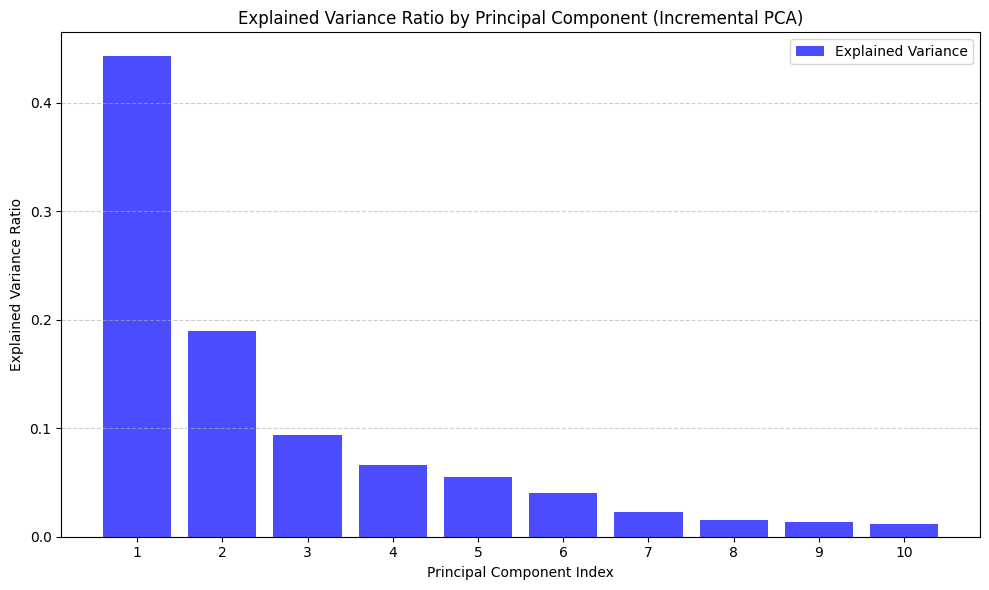

In [33]:
import matplotlib.pyplot as plt

# Plot the explained variance ratio for each principal component
plt.figure(figsize=(10, 6))
plt.bar(range(1, 10 + 1), ipca.explained_variance_ratio_, alpha=0.7, color='b', label='Explained Variance')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component (Incremental PCA)')
plt.xticks(range(1, 10 + 1))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

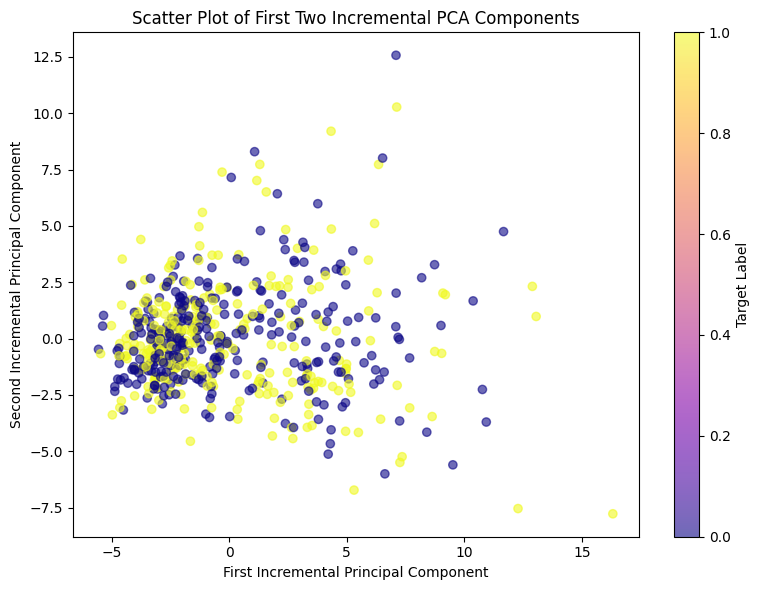

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(
    data_ipca[:, 0], 
    data_ipca[:, 1], 
    c=np.random.choice([0, 1], size=data_ipca.shape[0]),  # Replace with actual target labels
    cmap='plasma',
    alpha=0.6
)
plt.xlabel('First Incremental Principal Component')
plt.ylabel('Second Incremental Principal Component')
plt.title('Scatter Plot of First Two Incremental PCA Components')
plt.colorbar(label='Target Label')  # Optional for continuous/categorical target
plt.tight_layout()
plt.show()


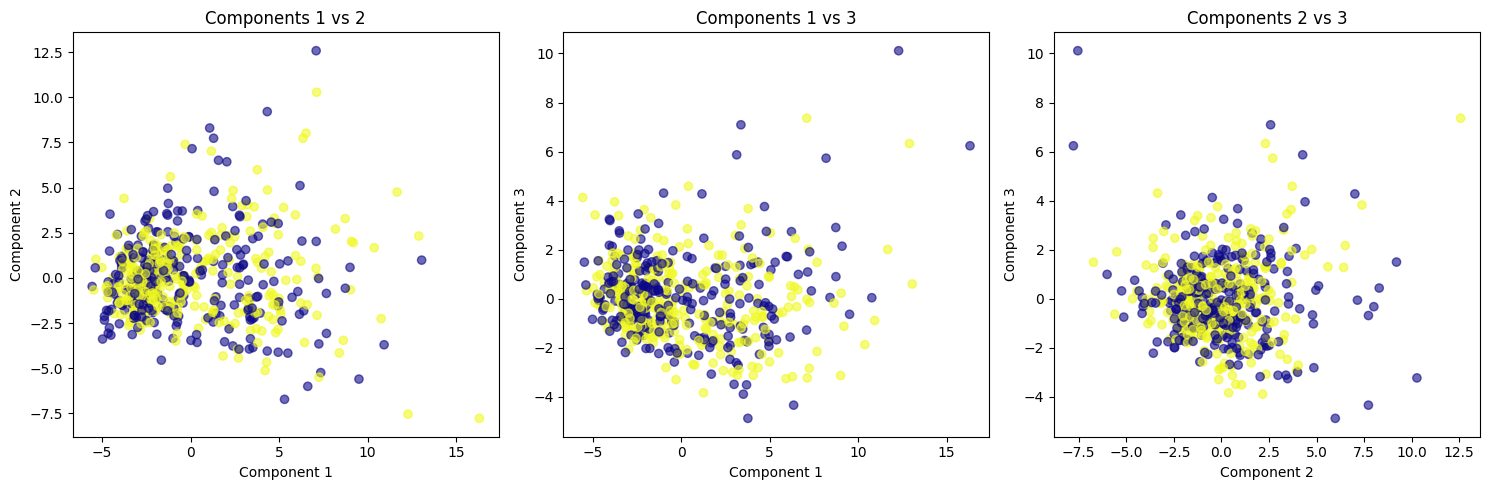

In [41]:
from itertools import combinations

# Pairwise scatter plot for first 3 components
pairs = list(combinations(range(3), 2))  # Choose combinations of components

plt.figure(figsize=(15, 5))
for i, (comp1, comp2) in enumerate(pairs):
    plt.subplot(1, 3, i + 1)
    plt.scatter(
        data_ipca[:, comp1], 
        data_ipca[:, comp2], 
        c=np.random.choice([0, 1], size=data_ipca.shape[0]),  # Replace with actual target labels
        cmap='plasma',
        alpha=0.6
    )
    plt.xlabel(f'Component {comp1 + 1}')
    plt.ylabel(f'Component {comp2 + 1}')
    plt.title(f'Components {comp1 + 1} vs {comp2 + 1}')
plt.tight_layout()
plt.show()